# Pixel clustering

In [1]:
import cv2 as cv
import numpy as np
import requests
from matplotlib import pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact

## Image import

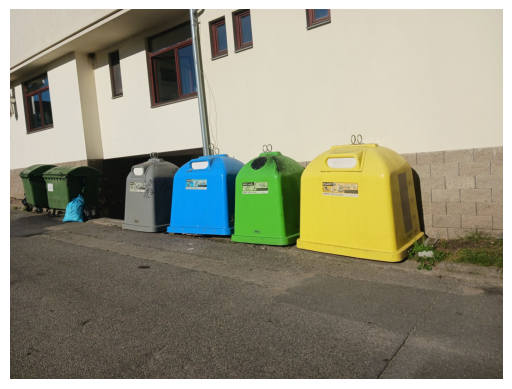

In [2]:
# Image URL
url = "https://d34-a.sdn.cz/d_34/c_img_oc_A/kcukOQcMmDac1jCG3ECYXtt/5f6f.jpeg?fl=res,2200,2200,1"

# Download the image
resp = requests.get(url)

img_array = np.frombuffer(resp.content, np.uint8)

# Decode image (OpenCV reads in BGR)
img = cv.imdecode(img_array, cv.IMREAD_COLOR)

# Convert BGR → RGB for Matplotlib
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Display
plt.imshow(img)
plt.axis("off")
plt.show()

## K-means clustering

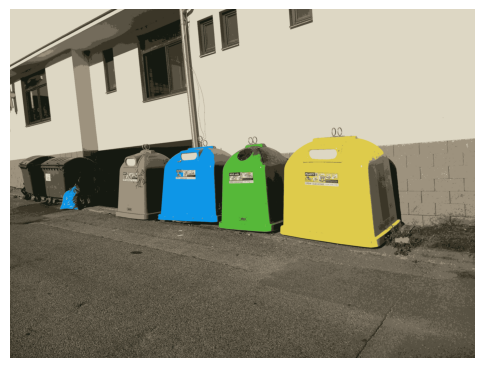

In [3]:
# Assume 'img' is your RGB image
Z = img.reshape((-1, 3))          # flatten image to (num_pixels, 3)
Z = np.float32(Z)                  # convert to float32 for kmeans

# Define criteria and number of clusters (K)
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 9  # number of clusters / segments
attempts = 10

# Apply K-means
_, labels, centers = cv.kmeans(Z, K, None, criteria, attempts, cv.KMEANS_RANDOM_CENTERS)

# Convert back to uint8 and reshape to image
centers = np.uint8(centers)
segmented_img = centers[labels.flatten()]
segmented_img = segmented_img.reshape(img.shape)

# Display
plt.figure(figsize=(6,6))
plt.imshow(segmented_img)
plt.axis("off")
plt.show()

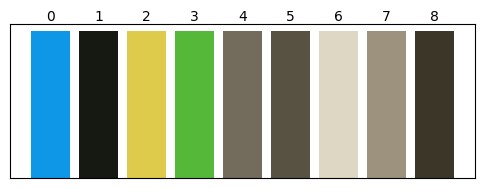

In [4]:
K = centers.shape[0]

plt.figure(figsize=(6, 2))
for i, color in enumerate(centers):
    plt.bar(i, 1, color=color/255.0)  # matplotlib expects RGB in 0-1
    plt.text(i, 1.05, str(i), ha='center', va='bottom')

plt.xticks([])
plt.yticks([])
plt.show()

## Cluster based segmentation

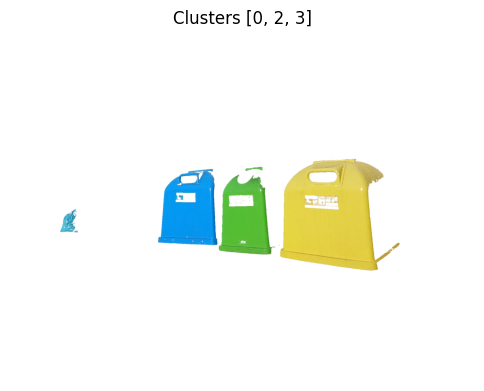

In [6]:
selected_clusters = [0, 2, 3]  # example

# Reshape labels to image shape
labels_img = labels.reshape(img.shape[:2])

# Create output image filled with background color
background_color = np.array([255, 255, 255], dtype=np.uint8)
output_img = np.ones_like(img, dtype=np.uint8) * background_color

# Mask for all selected clusters
mask = np.isin(labels_img, selected_clusters)

# Copy original pixels for selected clusters
output_img[mask] = img[mask]

# Display
plt.figure(figsize=(6,6))
plt.imshow(output_img)
plt.axis("off")
plt.title(f"Clusters {selected_clusters}")
plt.show()

## Pixel statistics

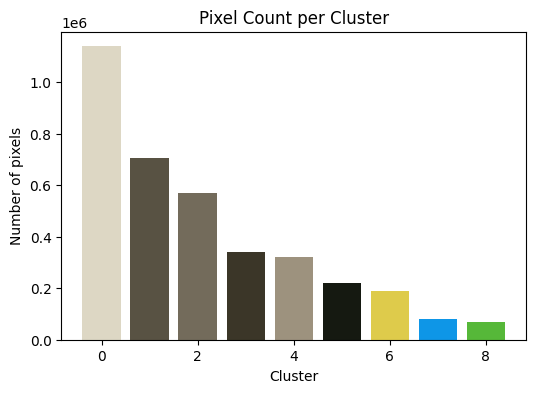

In [7]:
K = centers.shape[0]

# Count how many pixels are in each cluster
counts = np.bincount(labels.flatten(), minlength=K)

# Sort by count (optional)
idx_sort = np.argsort(counts)[::-1]
counts = counts[idx_sort]
colors = centers[idx_sort] / 255.0  # normalize to 0-1 for matplotlib

# Create horizontal bar plot
plt.figure(figsize=(6,4))
plt.bar(range(K), counts, color=colors)
plt.xlabel("Cluster")
plt.ylabel("Number of pixels")
plt.title("Pixel Count per Cluster")
plt.show()